# Lipid analysis

## Lindemann index

In [1]:
import numpy as np
import MDAnalysis as mda 
import matplotlib.pyplot as plt 
import seaborn as sns
from MDAnalysis.analysis import distances

In [2]:
u = mda.Universe('md.gro','nojump.xtc')

/home/akshay/apps/miniconda3/envs/py311/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/akshay/apps/miniconda3/envs/py311/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: R
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/akshay/apps/miniconda3/envs/py311/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [3]:
traj_mol_li = []
for time in range(0,3200,20):    
    mol_li = []
    selections = ['resname DSPC','resname CHOL']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            distance_array = []
            for i in a.residues:
                distance_array.append(distances.self_distance_array(i.atoms.positions))
            block.append(distance_array)
        block = np.array(block)
        block_sq = block**2
        mol_li.append((((block_sq.mean(axis=0) - block.mean(axis=0)**2)**0.5)/block.mean(axis=0)).mean(axis=1))
    selections = ['resname TZP']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            positions = []
            for i in a.residues:
                positions.append(i.atoms.positions)
            reshaped = np.concatenate(positions).reshape(-1, 28, 3)
            distance_array = []
            for arr in reshaped:
                distance_array.append(distances.self_distance_array(arr))
            block.append(distance_array)
        block = np.array(block)
        block_sq = block**2
        mol_li.append((((block_sq.mean(axis=0) - block.mean(axis=0)**2)**0.5)/block.mean(axis=0)).mean(axis=1))
    traj_mol_li.append(mol_li)

In [4]:
dspc_li = []
chol_li = []
tzp_li = []
formulation_li = []
for i in traj_mol_li:
    formulation_li.append(np.concatenate(i).mean())
    dspc_li.append(i[0].mean())
    chol_li.append(i[1].mean())
    tzp_li.append(i[2].mean())

In [5]:
np.save('dspc_chol_tzp_li.npy',formulation_li) 

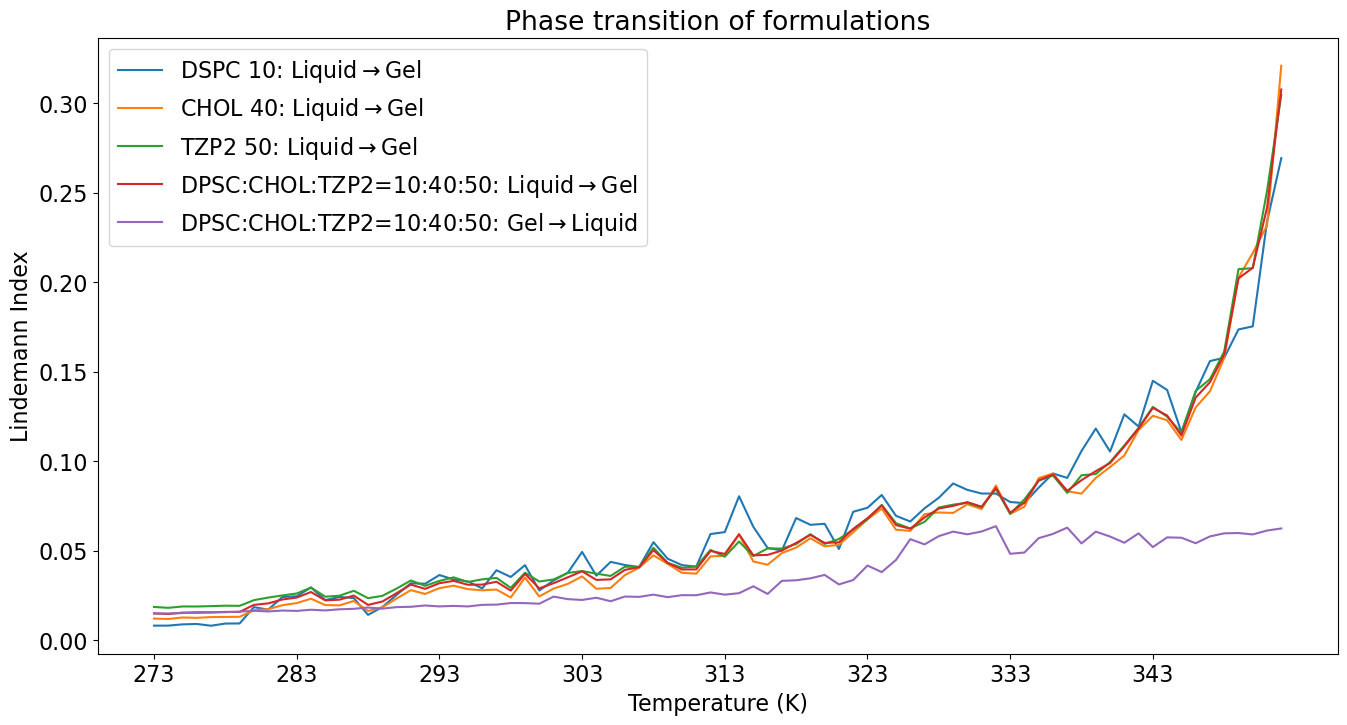

In [6]:
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.plot(dspc_li[80:0:-1], label=r'DSPC 10: Liquid$\to$Gel')
plt.plot(chol_li[80:0:-1], label=r'CHOL 40: Liquid$\to$Gel')
plt.plot(tzp_li[80:0:-1], label=r'TZP2 50: Liquid$\to$Gel')
plt.plot(formulation_li[80:0:-1], label=r'DPSC:CHOL:TZP2=10:40:50: Liquid$\to$Gel')
plt.plot(formulation_li[80:], label=r'DPSC:CHOL:TZP2=10:40:50: Gel$\to$Liquid')
#plt.plot(formulation_li[80:], label='Formulation Liquid-->Gel')
plt.xlabel('Temperature (K)')
plt.ylabel('Lindemann Index')
plt.xticks(range(0,80,10),[str(i) for i in range(273,353,10)])
plt.title('Phase transition of formulations')
plt.legend()